In [ ]:
import os
import pandas_datareader as pdr

df = pdr.get_data_tiingo('TTM', api_key='9f2dd8dbdb04ac8438fa833f54824c478faaf714')
df.to_csv('TTM.csv')

In [ ]:
import pandas as pd
df=pd.read_csv('TTM.csv')

In [ ]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TTM,2016-07-05 00:00:00+00:00,33.97,34.50,33.63,34.50,1043680,33.958747,34.488572,33.618860,34.488572,1043680,0.0,1.0
1,TTM,2016-07-06 00:00:00+00:00,34.18,34.27,33.48,33.69,950532,34.168678,34.258648,33.468910,33.678840,950532,0.0,1.0
2,TTM,2016-07-07 00:00:00+00:00,34.56,34.58,33.99,33.99,2124605,34.548552,34.568545,33.978741,33.978741,2124605,0.0,1.0
3,TTM,2016-07-08 00:00:00+00:00,35.38,35.46,35.01,35.07,1608131,35.368280,35.448254,34.998403,35.058383,1608131,0.0,1.0
4,TTM,2016-07-11 00:00:00+00:00,36.27,36.47,35.95,36.08,1657715,36.257986,36.457919,35.938092,36.068049,1657715,0.0,1.0


In [ ]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,TTM,2021-06-28 00:00:00+00:00,22.90,23.00,22.800,22.86,928800,22.90,23.00,22.800,22.86,928800,0.0,1.0
1255,TTM,2021-06-29 00:00:00+00:00,22.83,23.00,22.750,22.85,971116,22.83,23.00,22.750,22.85,971116,0.0,1.0
1256,TTM,2021-06-30 00:00:00+00:00,22.78,22.81,22.605,22.69,716443,22.78,22.81,22.605,22.69,716443,0.0,1.0
1257,TTM,2021-07-01 00:00:00+00:00,22.97,23.12,22.845,22.92,1032877,22.97,23.12,22.845,22.92,1032877,0.0,1.0
1258,TTM,2021-07-02 00:00:00+00:00,23.05,23.14,22.921,23.04,663973,23.05,23.14,22.921,23.04,663973,0.0,1.0


In [ ]:
df1=df.reset_index()['close']

In [ ]:
df1

0       33.97
1       34.18
2       34.56
3       35.38
4       36.27
        ...  
1254    22.90
1255    22.83
1256    22.78
1257    22.97
1258    23.05
Name: close, Length: 1259, dtype: float64

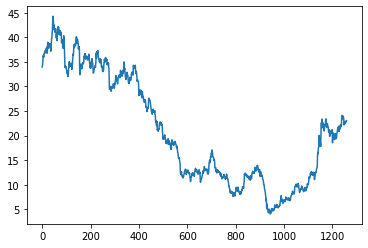

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
import numpy as np

df1

0       33.97
1       34.18
2       34.56
3       35.38
4       36.27
        ...  
1254    22.90
1255    22.83
1256    22.78
1257    22.97
1258    23.05
Name: close, Length: 1259, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.74334743]
 [0.74857001]
 [0.75802039]
 ...
 [0.46505844]
 [0.46978364]
 [0.47177319]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(818, 441)

In [ ]:
train_data

array([[0.74334743],
       [0.74857001],
       [0.75802039],
       [0.77841333],
       [0.80054713],
       [0.8017906 ],
       [0.79184283],
       [0.79706541],
       [0.80751057],
       [0.81546879],
       [0.81298185],
       [0.81422532],
       [0.81397662],
       [0.82715742],
       [0.82069137],
       [0.83188262],
       [0.83436956],
       [0.83113653],
       [0.83934345],
       [0.84332256],
       [0.81273315],
       [0.81646357],
       [0.84680428],
       [0.86844069],
       [0.86819199],
       [0.86471027],
       [0.83735389],
       [0.84804775],
       [0.86073116],
       [0.85501119],
       [0.859239  ],
       [0.85824422],
       [0.86172594],
       [0.850286  ],
       [0.84232778],
       [0.83785128],
       [0.82317831],
       [0.84183039],
       [0.86247202],
       [0.88833623],
       [0.88908232],
       [0.91245959],
       [0.92414822],
       [0.94876896],
       [0.99875653],
       [1.        ],
       [0.9868192 ],
       [0.947

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(717, 100)
(717,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:

model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 0s 28ms/step - loss: 0.0016 - val_loss: 0.0022
Epoch 2/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0015 - val_loss: 0.0019
Epoch 3/100
12/12 [==============================] - 0s 18ms/step - loss: 0.0015 - val_loss: 0.0020
Epoch 4/100
12/12 [==============================] - 0s 18ms/step - loss: 0.0015 - val_loss: 0.0019
Epoch 5/100
12/12 [==============================] - 0s 18ms/step - loss: 0.0015 - val_loss: 0.0019
Epoch 6/100
12/12 [==============================] - 0s 18ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 7/100
12/12 [==============================] - 0s 18ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 8/100
12/12 [==============================] - 0s 18ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 9/100
12/12 [==============================] - 0s 18ms/step - loss: 0.0014 - val_loss: 0.0020
Epoch 10/100
12/12 [==============================] - 0s 18ms/step - loss: 0.0014 - val_loss: 0.0018

In [ ]:
import tensorflow as tf

In [ ]:

### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

24.84472187300225

In [ ]:

### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

13.593061429707504

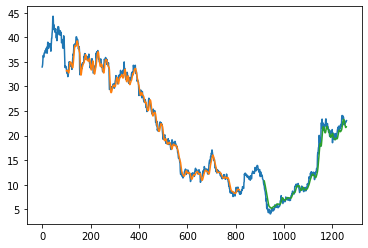

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

441

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.4516289480228798,
 0.45187764237751804,
 0.46008455608057697,
 0.45088286495896546,
 0.45461328027853765,
 0.4424272569012684,
 0.43148470529718974,
 0.41979607062919677,
 0.44391942302909726,
 0.4488933101218602,
 0.44864461576722214,
 0.44541158915692614,
 0.4598358617259388,
 0.47923402138771454,
 0.48097488187018156,
 0.4580950012434718,
 0.45361850285998506,
 0.43745336980850535,
 0.4391942302909724,
 0.44342203431982097,
 0.45734891817955725,
 0.44491420044764984,
 0.4429246456105447,
 0.4409350907734394,
 0.42899776175080817,
 0.413578711763243,
 0.42626212384978857,
 0.4190499875652822,
 0.41258393434469043,
 0.39393185774682915,
 0.3919423029097239,
 0.40586918676946027,
 0.40512310370554594,
 0.40885351902511813,
 0.4155682666003482,
 0.4215369311116638,
 0.4190499875652822,
 0.4168117383735389,
 0.407112658542651,
 0.4192986819199205,
 0.42675951255906486,
 0.36010942551604075,
 0.38746580452623725,
 0.3971648843571251,
 0.4001492166127829,
 0.40860482467048,
 0.396418801

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.44737437]
101
1 day input [0.45187764 0.46008456 0.45088286 0.45461328 0.44242726 0.43148471
 0.41979607 0.44391942 0.44889331 0.44864462 0.44541159 0.45983586
 0.47923402 0.48097488 0.458095   0.4536185  0.43745337 0.43919423
 0.44342203 0.45734892 0.4449142  0.44292465 0.44093509 0.42899776
 0.41357871 0.42626212 0.41904999 0.41258393 0.39393186 0.3919423
 0.40586919 0.4051231  0.40885352 0.41556827 0.42153693 0.41904999
 0.41681174 0.40711266 0.41929868 0.42675951 0.36010943 0.3874658
 0.39716488 0.40014922 0.40860482 0.3964188  0.3790102  0.38671972
 0.37602586 0.38846058 0.39119622 0.40164138 0.40661527 0.39840836
 0.37975628 0.3874658  0.38249192 0.38870928 0.40562049 0.41034569
 0.42203432 0.42949515 0.43073862 0.43720468 0.42675951 0.44317334
 0.44342203 0.41706043 0.42501865 0.42825168 0.43372295 0.42999254
 0.43969162 0.45013678 0.43894554 0.4404377  0.45411589 0.45162895
 0.48545138 0.49042527 0.49813479 0.48097488 0.4844566  0.49291221
 0.49490177 0.4891818  0.48594877 0

In [ ]:

day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:

len(df1)

1259

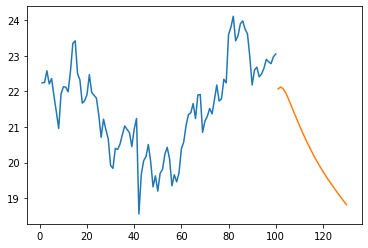

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1159:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

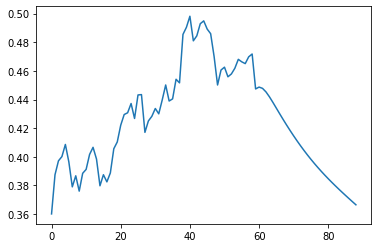

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

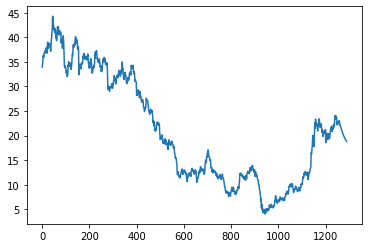

In [ ]:
plt.plot(df3)